<a href="https://colab.research.google.com/github/Suyash-Rajput/Market-segmentation/blob/main/Case_study_on_fast_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/mcdonalds.csv")

In [3]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [6]:
data = data.replace({'yummy': {'Yes': 1, 
                                'No': 0}})

In [7]:
data = data.replace({'convenient': {'Yes': 1, 
                                'No': 0}})
data = data.replace({'spicy': {'Yes': 1, 
                                'No': 0}})
data = data.replace({'fattening': {'Yes': 1, 
                                'No': 0}})
data = data.replace({'greasy': {'Yes': 1, 
                                'No': 0}})
data = data.replace({'fast': {'Yes': 1, 
                                'No': 0}})
data = data.replace({'cheap': {'Yes': 1, 
                                'No': 0}})
data = data.replace({'tasty': {'Yes': 1, 
                                'No': 0}})
data = data.replace({'expensive': {'Yes': 1, 
                                'No': 0}})
data = data.replace({'healthy': {'Yes': 1, 
                                'No': 0}})
data = data.replace({'disgusting': {'Yes': 1, 
                                'No': 0}})

In [8]:
X = data.iloc[: , 0:11].values  

In [9]:
print(X)

[[0 1 0 ... 1 0 0]
 [1 1 0 ... 1 0 0]
 [0 1 1 ... 1 1 0]
 ...
 [1 1 0 ... 1 0 0]
 [1 1 0 ... 0 1 0]
 [0 1 0 ... 1 0 1]]


In [10]:
X.shape

(1453, 11)

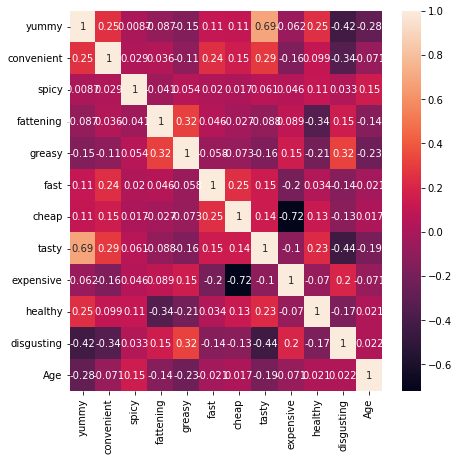

In [11]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [12]:

from sklearn.decomposition import PCA
pca_data = PCA(n_components=11)
principalComponents_data = pca_data.fit_transform(X)

In [14]:
df1 = pd.DataFrame(data = principalComponents_data
             , columns = ['principal component 1', 'principal component 2','principal component 3',
                          'principal component 4','principal component 5'
                         ,'principal component 6','principal component 7','principal component 8','principal component 9',
                        'principal component 10','principal component 11'
                         ])

In [15]:
df1 = pd.DataFrame(data = principalComponents_data
             , columns = ['principal component 1', 'principal component 2','principal component 3',
                          'principal component 4','principal component 5'
                         ,'principal component 6','principal component 7','principal component 8','principal component 9',
                        'principal component 10','principal component 11'
                         ])

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [18]:
kmeans.cluster_centers_ 

array([[ 9.35222672e-01,  9.59514170e-01,  1.37651822e-01,
         9.67611336e-01,  6.59919028e-01,  8.70445344e-01,
         1.21457490e-01,  9.55465587e-01,  1.00000000e+00,
         1.94331984e-01,  1.21457490e-01],
       [ 6.66133815e-16,  9.54022989e-01,  6.89655172e-02,
         9.36781609e-01,  4.25287356e-01,  9.82758621e-01,
         9.48275862e-01,  2.12643678e-01,  2.29885057e-02,
         8.04597701e-02, -2.77555756e-16],
       [ 9.87124464e-01,  9.82832618e-01,  8.15450644e-02,
         1.00000000e+00,  0.00000000e+00,  9.65665236e-01,
         9.05579399e-01,  9.74248927e-01,  3.00429185e-02,
         2.91845494e-01,  2.14592275e-02],
       [ 1.75438596e-02,  5.90643275e-01,  7.60233918e-02,
         9.64912281e-01,  8.65497076e-01,  7.13450292e-01,
         3.50877193e-02,  6.43274854e-02,  9.70760234e-01,
         4.09356725e-02,  8.47953216e-01],
       [ 2.11267606e-02,  8.38028169e-01,  7.74647887e-02,
         9.64788732e-01,  7.81690141e-01,  9.50704225e-01,
  

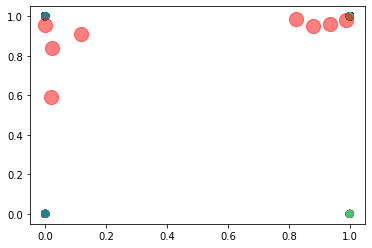

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In [20]:
kmeans.score(X)

-1189.7215414204816

In [21]:
kmeans.inertia_

1189.7215414204816

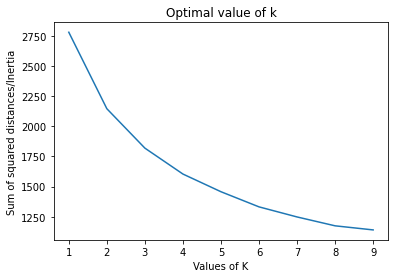

In [22]:
SSD = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 SSD.append(kmeans.inertia_)
plt.plot(K,SSD)
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Optimal value of k")
plt.show()

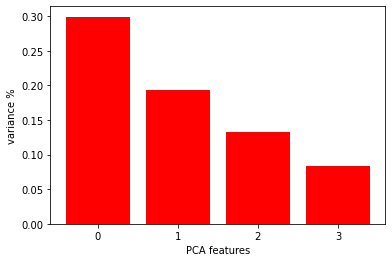

In [23]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='red')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

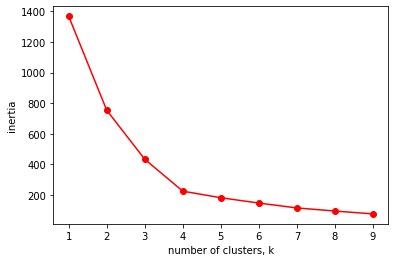

In [26]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='red')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [25]:
pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(data)
frame['cluster'] = pred
frame.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,8
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,2
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,4
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,7


In [27]:
avg_df = data.groupby(['cluster'], as_index=False).mean()
avg_df

,cluster,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age
0,0,1.000000,0.986799,0.092409,0.722772,0.102310,0.963696,1.000000,1.000000,0.000000,0.488449,0.003300,45.594059
1,1,0.095238,0.809524,0.095238,0.880952,0.619048,0.833333,0.297619,0.178571,0.297619,0.035714,0.440476,48.869048
2,2,0.265487,0.938053,0.106195,0.893805,0.522124,0.814159,0.008850,0.539823,1.000000,0.123894,0.292035,46.424779
3,3,0.006369,0.834395,0.082803,0.987261,0.859873,0.942675,1.000000,0.006369,0.000000,0.031847,0.636943,48.006369
4,4,0.747748,0.977477,0.090090,0.932432,0.720721,0.954955,1.000000,0.963964,0.000000,0.085586,0.099099,40.184685
5,5,0.979899,0.959799,0.095477,0.874372,0.482412,0.874372,0.000000,0.984925,1.000000,0.241206,0.010050,39.477387
6,6,0.000000,0.586207,0.068966,0.951724,0.855172,0.668966,0.000000,0.000000,0.993103,0.000000,0.834483,47.365517
7,7,0.048780,0.951220,0.056911,0.869919,0.471545,0.983740,1.000000,0.373984,0.000000,0.130081,0.146341,49.715447
8,8,0.878505,0.981308,0.177570,0.794393,0.467290,0.953271,0.364486,0.934579,0.364486,0.336449,0.177570,40.635514


In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Market segmentation")
dend = shc.dendrogram(shc.linkage(X, method='ward'))